# Data Visualization - Twitter Data

The Twitter data is clearly the most complex data used in the analysis. Two of its trickiest traits are the fact that the number of tweets grows season over season, and that some tweets have been deleted. Here, we want to produce a visualization to illustrate these phenomena.

#### Setup

In [26]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

In [27]:
tweets = pd.read_csv('../data/data_modified/tweets/tweets_sentiment.csv')

#### Classify tweets by season

In [28]:
split_date_2010 = dt.date(2011, 5, 1)
split_date_2011 = dt.date(2012, 5, 1)

tweets['tweet_UTCtime'] = pd.to_datetime(tweets['tweet_UTCtime'])
tweets['season'] = ['2010' if date < split_date_2010 else '2011' if date < split_date_2011 else '2012' for date in tweets['tweet_UTCtime']]

tweets_grouped = tweets.groupby('season').agg(
    count_tweets=pd.NamedAgg(column='tweet_id', aggfunc='count'),
    count_remaining=pd.NamedAgg(column='sentiment', aggfunc=(lambda x: sum(~np.isnan(x)))))

#### Create plot

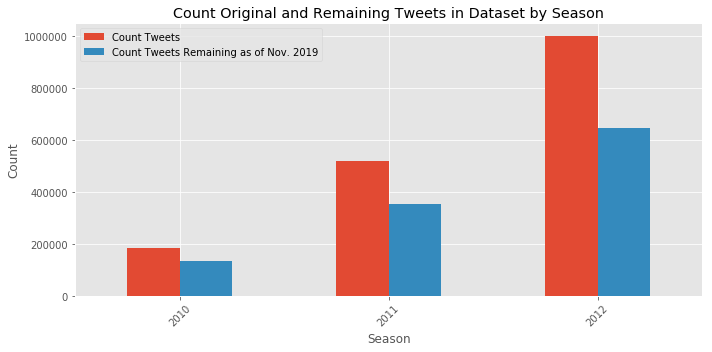

In [33]:
plt.rcParams['figure.figsize'] = (10, 5)
tweets_grouped.plot.bar()
plt.legend(["Count Tweets", "Count Tweets Remaining as of Nov. 2019"]);
plt.ylabel('Count')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.title('Count Original and Remaining Tweets in Dataset by Season')
plt.tight_layout()
plt.savefig('../plots/eda_twitter/tweets_by_season.png')
plt.show()